In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pay = pd.read_csv('WA_Fn-UseC_-Accounts-Receivable.csv')

In [3]:
pay.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


In [4]:
pay.groupby('customerID')['countryCode'].count().sort_values()

customerID
2621-XCLEH    15
0187-ERLSR    16
7245-CKNCN    17
3676-CQAIF    17
4632-QZOKX    17
              ..
9286-VLKMI    34
0688-XNJRO    34
4640-FGEJI    35
8887-NCUZC    35
9149-MATVB    36
Name: countryCode, Length: 100, dtype: int64

In [5]:
pay['PaperlessDate'] = pd.to_datetime(pay['PaperlessDate'])
pay['InvoiceDate'] = pd.to_datetime(pay['InvoiceDate'])
pay['DueDate'] = pd.to_datetime(pay['DueDate'])
pay['SettledDate'] = pd.to_datetime(pay['SettledDate'])
pay['countryCode'] = pay['countryCode'].astype(str)
pay['PaymentTerm'] = (pay['DueDate'] - pay['InvoiceDate']).dt.days

In [6]:
pay.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaymentTerm
0,391,0379-NEVHP,2013-04-06,611365,2013-01-02,2013-02-01,55.94,No,2013-01-15,Paper,13,0,30
1,406,8976-AMJEO,2012-03-03,7900770,2013-01-26,2013-02-25,61.74,Yes,2013-03-03,Electronic,36,6,30
2,391,2820-XGXSB,2012-01-26,9231909,2013-07-03,2013-08-02,65.88,No,2013-07-08,Electronic,5,0,30
3,406,9322-YCTQO,2012-04-06,9888306,2013-02-10,2013-03-12,105.92,No,2013-03-17,Electronic,35,5,30
4,818,6627-ELFBK,2012-11-26,15752855,2012-10-25,2012-11-24,72.27,Yes,2012-11-28,Paper,34,4,30


In [7]:
pay[pay['DaysLate']>0]['DaysLate'].hist(bins=100)

In [8]:
pay.loc[pay['DaysLate']==0,'DaysLate_Code'] = 'on time'
pay.loc[(pay['DaysLate']>0) & (pay['DaysLate']<11),'DaysLate_Code'] = '0-10 Days'
pay.loc[(pay['DaysLate']>10) & (pay['DaysLate']<21),'DaysLate_Code'] = '11-20 Days'
pay.loc[pay['DaysLate']>20,'DaysLate_Code'] = '20+ Days'

In [9]:
pay = pay.sort_values(by=['customerID','InvoiceDate'])

In [10]:
pay.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaymentTerm,DaysLate_Code
991,391,0187-ERLSR,2013-07-31,4037644863,2012-03-29,2012-04-28,62.68,Yes,2012-04-25,Paper,27,0,30,on time
2345,391,0187-ERLSR,2013-07-31,9471530987,2012-05-15,2012-06-14,77.19,No,2012-05-28,Paper,13,0,30,on time
2401,391,0187-ERLSR,2013-07-31,9744145268,2012-05-21,2012-06-20,51.65,No,2012-06-04,Paper,14,0,30,on time
1791,391,0187-ERLSR,2013-07-31,7214076449,2012-06-16,2012-07-16,64.47,Yes,2012-07-04,Paper,18,0,30,on time
445,391,0187-ERLSR,2013-07-31,1756742390,2012-09-05,2012-10-05,84.57,No,2012-09-14,Paper,9,0,30,on time


In [11]:
pay = pay.drop(['PaperlessDate','invoiceNumber'],axis=1)

In [12]:
pay.head()

,countryCode,customerID,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaymentTerm,DaysLate_Code
991,391,0187-ERLSR,2012-03-29,2012-04-28,62.68,Yes,2012-04-25,Paper,27,0,30,on time
2345,391,0187-ERLSR,2012-05-15,2012-06-14,77.19,No,2012-05-28,Paper,13,0,30,on time
2401,391,0187-ERLSR,2012-05-21,2012-06-20,51.65,No,2012-06-04,Paper,14,0,30,on time
1791,391,0187-ERLSR,2012-06-16,2012-07-16,64.47,Yes,2012-07-04,Paper,18,0,30,on time
445,391,0187-ERLSR,2012-09-05,2012-10-05,84.57,No,2012-09-14,Paper,9,0,30,on time


In [13]:
pay['late_invoices'] = np.where(pay['DaysLate'] > 0,1,0)
pay['late_invoice_Amt'] = np.where(pay['DaysLate'] > 0,pay['InvoiceAmount'],0)

In [14]:
import pandasql as ps

In [15]:
sqlcode = '''select *,sum(InvoiceAmount) over(partition by customerID order by InvoiceDate ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as total_invoice_amt,
sum(late_invoice_Amt) over(partition by customerID order by InvoiceDate ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as total_late_invoice_amt,
sum(late_invoices) over(partition by customerID order by InvoiceDate ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as total_late_invoices,
count() over(partition by customerID order by InvoiceDate ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as total_invoices
from pay'''

pay2 = ps.sqldf(sqlcode, locals())

In [16]:
pay2.head()

,countryCode,customerID,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaymentTerm,DaysLate_Code,late_invoices,late_invoice_Amt,total_invoice_amt,total_late_invoice_amt,total_late_invoices,total_invoices
0,391,0187-ERLSR,2012-03-29 00:00:00.000000,2012-04-28 00:00:00.000000,62.68,Yes,2012-04-25 00:00:00.000000,Paper,27,0,30,on time,0,0.0,NaN,NaN,NaN,0
1,391,0187-ERLSR,2012-05-15 00:00:00.000000,2012-06-14 00:00:00.000000,77.19,No,2012-05-28 00:00:00.000000,Paper,13,0,30,on time,0,0.0,62.68,0.0,0.0,1
2,391,0187-ERLSR,2012-05-21 00:00:00.000000,2012-06-20 00:00:00.000000,51.65,No,2012-06-04 00:00:00.000000,Paper,14,0,30,on time,0,0.0,139.87,0.0,0.0,2
3,391,0187-ERLSR,2012-06-16 00:00:00.000000,2012-07-16 00:00:00.000000,64.47,Yes,2012-07-04 00:00:00.000000,Paper,18,0,30,on time,0,0.0,191.52,0.0,0.0,3
4,391,0187-ERLSR,2012-09-05 00:00:00.000000,2012-10-05 00:00:00.000000,84.57,No,2012-09-14 00:00:00.000000,Paper,9,0,30,on time,0,0.0,255.99,0.0,0.0,4


In [17]:
pay2['late_invoice_amt_pct'] = pay2['total_late_invoice_amt']/pay2['total_invoice_amt']
pay2['late_invoices_pct'] = pay2['total_late_invoices']/pay2['total_invoices']

In [18]:
pay2 = pay2.replace(np.NaN,0)

In [19]:
pay2.head()

,countryCode,customerID,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaymentTerm,DaysLate_Code,late_invoices,late_invoice_Amt,total_invoice_amt,total_late_invoice_amt,total_late_invoices,total_invoices,late_invoice_amt_pct,late_invoices_pct
0,391,0187-ERLSR,2012-03-29 00:00:00.000000,2012-04-28 00:00:00.000000,62.68,Yes,2012-04-25 00:00:00.000000,Paper,27,0,30,on time,0,0.0,0.00,0.0,0.0,0,0.0,0.0
1,391,0187-ERLSR,2012-05-15 00:00:00.000000,2012-06-14 00:00:00.000000,77.19,No,2012-05-28 00:00:00.000000,Paper,13,0,30,on time,0,0.0,62.68,0.0,0.0,1,0.0,0.0
2,391,0187-ERLSR,2012-05-21 00:00:00.000000,2012-06-20 00:00:00.000000,51.65,No,2012-06-04 00:00:00.000000,Paper,14,0,30,on time,0,0.0,139.87,0.0,0.0,2,0.0,0.0
3,391,0187-ERLSR,2012-06-16 00:00:00.000000,2012-07-16 00:00:00.000000,64.47,Yes,2012-07-04 00:00:00.000000,Paper,18,0,30,on time,0,0.0,191.52,0.0,0.0,3,0.0,0.0
4,391,0187-ERLSR,2012-09-05 00:00:00.000000,2012-10-05 00:00:00.000000,84.57,No,2012-09-14 00:00:00.000000,Paper,9,0,30,on time,0,0.0,255.99,0.0,0.0,4,0.0,0.0


In [20]:
pay = pay2.drop(['countryCode','customerID','InvoiceDate','DueDate','SettledDate','DaysToSettle','DaysLate'],axis=1)

In [21]:
pay_x = pay.drop('DaysLate_Code',axis=1)
pay_y = pay[['DaysLate_Code']]

In [22]:
pay_x['Disputed'].value_counts()

No     1905
Yes     561
Name: Disputed, dtype: int64

In [23]:
pay_x['Disputed'] = np.where(pay_x['Disputed']=='Yes',1,0)

In [24]:
pay_x['PaperlessBill'].value_counts()

Paper         1263
Electronic    1203
Name: PaperlessBill, dtype: int64

In [25]:
pay_x['PaperlessBill'] = np.where(pay_x['PaperlessBill']=='Electronic',1,0)

In [26]:
import scipy.misc

In [96]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import label_binarize

In [97]:
#Y = label_binarize(pay_y, classes=[0, 1, 2, 4])
#n_classes = Y.shape[1]

In [101]:
X_train, X_test,Y_train,Y_test = train_test_split(pay_x,pay_y,test_size=0.2,random_state=42)

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [103]:
param_grid = [{'C': [0.1,0.2,0.5,1,5,10],'penalty': ['l1', 'l2']}]

model = LogisticRegression()

scorer = sklearn.metrics.make_scorer(sklearn.metrics.precision_score, average = 'weighted')

model2 = GridSearchCV(model, param_grid,cv=5, n_jobs=-1,scoring=scorer)
model2.fit(X_train,Y_train)
print(model2.best_params_)
print(model2.best_score_)

{'C': 10, 'penalty': 'l2'}
0.8587342843807274


In [ ]:
param_grid = [{'C': [0.1,0.2,0.5,1,5,10],'penalty': ['elasticnet'],'solver':['saga'],
               'l1_ratio':[0.1,0.2,0.5,1]}]

model = LogisticRegression()

model2 = GridSearchCV(model, param_grid,cv=5, n_jobs=-1,scoring=scorer)
model2.fit(X_train,Y_train)
print(model2.best_params_)
print(model2.best_score_)

In [ ]:
lin_clfs = LogisticRegression(C=10, penalty='l2')
lin_clfs.fit(X_train, Y_train)
scores = cross_val_score(lin_clfs, X_train, Y_train, n_jobs=-1,cv=5, scoring=scorer)
print("Logistic training Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
y_pred = lin_clfs.fit(X_train_scaled, Y_train).predict(X_test_scaled)
lin_test = metrics.accuracy_score(Y_test, y_pred)
print("Logistic test score:",lin_test)

In [95]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_pred[:, i])
    average_precision[i] = average_precision_score(Y_test.iloc[:, i], y_pred.iloc[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_pred.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

NameError: name 'recall' is not defined

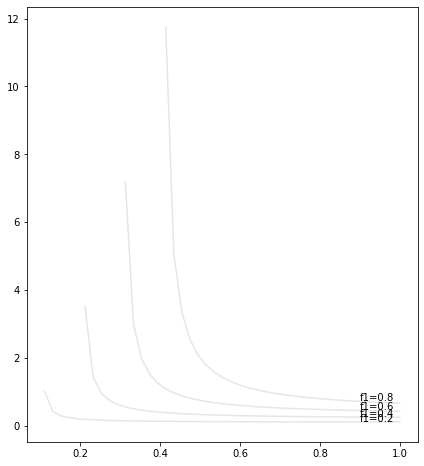

In [91]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

### KNN Classifier

In [74]:
from sklearn import neighbors
param_grid_k = [{'n_neighbors': range(1,100),'weights': ["uniform", "distance"]}]

knn_clfs = neighbors.KNeighborsClassifier()
grid_search1 = GridSearchCV(knn_clfs, param_grid_k, cv=5, n_jobs=-1,scoring=scorer)
grid_search1.fit(X_train_scaled, Y_train)
print(grid_search1.best_params_)
print(grid_search1.best_score_)

{'n_neighbors': 31, 'weights': 'distance'}
0.8560418639522159


In [75]:
knn_clfs = neighbors.KNeighborsClassifier(n_neighbors=31,weights='distance')
scores = cross_val_score(knn_clfs, X_train_scaled, Y_train, n_jobs=-1,cv=5, scoring=scorer)
print("Knn Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Knn Score: 0.86 (+/- 0.03)


In [76]:
y_pred = knn_clfs.fit(X_train_scaled, Y_train).predict(X_test_scaled)
knn_test = metrics.accuracy_score(Y_test, y_pred)
print("knn test score:",knn_test)

knn test score: 0.8805668016194332


### Decision Trees

In [77]:
# Tree Regression
from sklearn import tree

param_grid_t = [{'max_depth': range(1,20), 'min_samples_split': range(2,20)}]

tree_clf = tree.DecisionTreeClassifier()
grid_search1 = GridSearchCV(tree_clf, param_grid_t, cv=5, n_jobs=-1,scoring=scorer)
grid_search1.fit(X_train, Y_train)
print(grid_search1.best_params_)
print(grid_search1.best_score_)

{'max_depth': 5, 'min_samples_split': 3}
0.8478242323059341


In [78]:
tree_clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=3)
scores = cross_val_score(tree_clf, X_train, Y_train, n_jobs=-1,cv=5, scoring=scorer)
print("Regression Tree Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Regression Tree Score: 0.85 (+/- 0.03)


In [79]:
y_pred = tree_clf.fit(X_train, Y_train).predict(X_test)
tree_test = metrics.accuracy_score(Y_test, y_pred)
print("Regression Tree test Score:",tree_test)

Regression Tree test Score: 0.8603238866396761


### SVM Classifier

In [80]:
from sklearn import svm
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1,1e-3,1e-4,1e-5],'C': [1, 10, 100, 1000,10000]},
                    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
                    {'kernel': ['poly'], 'degree': [1,2,3],'C': [1, 10, 100, 1000,10000]}]

for i,p in enumerate(tuned_parameters):
    clf = GridSearchCV(svm.SVC(), p, cv=5,scoring=scorer)
    clf.fit(X_train_scaled, Y_train)
    print(clf.best_params_)
    print(clf.best_score_)

{'C': 10000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.8516957339976222
{'C': 100, 'kernel': 'linear'}
0.85149887556672
{'C': 1000, 'degree': 2, 'kernel': 'poly'}
0.8562793309448623


In [ ]:
xgb_clf = XGBClassifier(learning_rate=0.001, max_depth=3, n_estimators=500)
scores = cross_val_score(xgb_clf, X_train, Y_train, n_jobs=-1,cv=5, scoring=scorer)
print("Xgboost Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

### XGBoost

In [81]:
from xgboost import XGBClassifier
params = {'n_estimators':[250,500,750],'learning_rate':[0.001,0.01,0.1],'max_depth':[1,2,3,4,5,6]}

xgb2 = XGBClassifier(objective='multi:softmax',random_state=42)
clf = GridSearchCV(xgb2,params,cv=3,scoring=scorer)
clf.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='multi:softmax',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [250, 5

In [82]:
print(clf.best_params_)
print(clf.best_score_)

{'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 500}
0.8532779029224185


In [85]:
xgb_clf = XGBClassifier(learning_rate=0.001, max_depth=3, n_estimators=500)
scores = cross_val_score(xgb_clf, X_train, Y_train, n_jobs=-1,cv=5, scoring=scorer)
print("Xgboost Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Xgboost Score: 0.85 (+/- 0.03)


In [87]:
y_pred = xgb_clf.fit(X_train, Y_train).predict(X_test)
tree_test = metrics.accuracy_score(Y_test, y_pred)
print("Xgboost test Score:",tree_test)

Xgboost test Score: 0.8846153846153846
